<a href="https://colab.research.google.com/github/Gayathri205-ag/Data-Science/blob/main/Colour_Detection_in_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

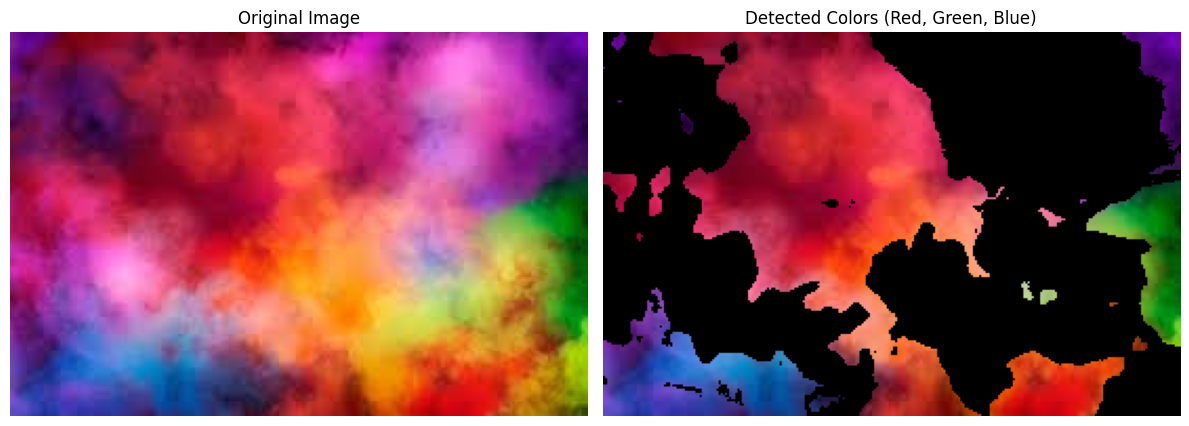

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load and convert image
img = cv2.imread('/content/colour.jpg')  # Replace with your image
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Define HSV color ranges
colors_hsv = {
    'Red1': ((0, 120, 70), (10, 255, 255)),
    'Red2': ((170, 120, 70), (180, 255, 255)),
    'Green': ((40, 40, 40), (80, 255, 255)),
    'Blue': ((100, 150, 0), (140, 255, 255)),
}

# Generate masks
mask_red1 = cv2.inRange(hsv, *colors_hsv['Red1'])
mask_red2 = cv2.inRange(hsv, *colors_hsv['Red2'])
mask_red = cv2.bitwise_or(mask_red1, mask_red2)
mask_green = cv2.inRange(hsv, *colors_hsv['Green'])
mask_blue = cv2.inRange(hsv, *colors_hsv['Blue'])

# Merge all masks
combined_mask = cv2.bitwise_or(mask_red, mask_green)
combined_mask = cv2.bitwise_or(combined_mask, mask_blue)

# Apply mask
result = cv2.bitwise_and(img, img, mask=combined_mask)
result_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)

# Show results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(result_rgb)
plt.title("Detected Colors (Red, Green, Blue)")
plt.axis('off')

plt.tight_layout()
plt.show()